In [1]:
import os
import gc
import warnings

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns



In [2]:
fin=pd.read_csv('financials.csv')
opt=pd.read_csv('options.csv')
sec=pd.read_csv('secondary_stock_prices.csv')
stock=pd.read_csv('stock_prices.csv')
trades=pd.read_csv('trades.csv')

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (14,15,16,17,18,19,42,44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
fin.head()

,DisclosureNumber,DateCode,Date,SecuritiesCode,DisclosedDate,DisclosedTime,DisclosedUnixTime,TypeOfDocument,CurrentPeriodEndDate,TypeOfCurrentPeriod,...,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
0,2.016121e+13,20170104_2753,2017-01-04,2753.0,2017-01-04,07:30:00,1.483483e+09,3QFinancialStatements_Consolidated_JP,2016-12-31,3Q,...,319.76,NaN,False,True,False,False,False,6848800.0,－,6848800.0
1,2.017010e+13,20170104_3353,2017-01-04,3353.0,2017-01-04,15:00:00,1.483510e+09,3QFinancialStatements_Consolidated_JP,2016-11-30,3Q,...,485.36,NaN,False,True,False,False,False,2035000.0,118917,1916083.0
2,2.016123e+13,20170104_4575,2017-01-04,4575.0,2017-01-04,12:00:00,1.483499e+09,ForecastRevision,2016-12-31,2Q,...,-93.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.017010e+13,20170105_2659,2017-01-05,2659.0,2017-01-05,15:00:00,1.483596e+09,3QFinancialStatements_Consolidated_JP,2016-11-30,3Q,...,285.05,NaN,False,True,False,False,False,31981654.0,18257,31963405.0
4,2.017011e+13,20170105_3050,2017-01-05,3050.0,2017-01-05,15:30:00,1.483598e+09,ForecastRevision,2017-02-28,FY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
opt.head()

,DateCode,Date,OptionsCode,WholeDayOpen,WholeDayHigh,WholeDayLow,WholeDayClose,NightSessionOpen,NightSessionHigh,NightSessionLow,...,Putcall,LastTradingDay,SpecialQuotationDay,SettlementPrice,TheoreticalPrice,BaseVolatility,ImpliedVolatility,InterestRate,DividendRate,Dividend
0,20170104_132010018,2017-01-04,132010018,650.0,650.0,480.0,480.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,480.0,478.4587,17.4736,17.5865,0.0091,0.0,0.0
1,20170104_132010118,2017-01-04,132010118,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,575.0,571.1385,17.4736,16.5000,0.0091,0.0,0.0
2,20170104_132010218,2017-01-04,132010218,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,680.0,677.3710,17.4736,15.8644,0.0091,0.0,0.0
3,20170104_132010318,2017-01-04,132010318,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,795.0,791.0383,17.4736,15.2288,0.0091,0.0,0.0
4,20170104_132010518,2017-01-04,132010518,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,...,1,20170112,20170113,910.0,909.9947,17.4736,14.5932,0.0091,0.0,0.0


In [5]:
sec.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1305,2017-01-04,1305,1594.0,1618.0,1594.0,1615.0,538190,1.0,NaN,False,-0.001855
1,20170104_1306,2017-01-04,1306,1575.0,1595.0,1573.0,1593.0,2494980,1.0,NaN,False,-0.000627
2,20170104_1308,2017-01-04,1308,1557.0,1580.0,1557.0,1578.0,526100,1.0,NaN,False,-0.001900
3,20170104_1309,2017-01-04,1309,28810.0,29000.0,28520.0,28780.0,403,1.0,NaN,False,0.005237
4,20170104_1311,2017-01-04,1311,717.0,735.0,717.0,734.0,5470,1.0,NaN,False,0.001359


In [6]:
stock.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026


In [8]:
trades.head()

,Date,StartDate,EndDate,Section,TotalSales,TotalPurchases,TotalTotal,TotalBalance,ProprietarySales,ProprietaryPurchases,...,CityBKsRegionalBKsEtcTotal,CityBKsRegionalBKsEtcBalance,TrustBanksSales,TrustBanksPurchases,TrustBanksTotal,TrustBanksBalance,OtherFinancialInstitutionsSales,OtherFinancialInstitutionsPurchases,OtherFinancialInstitutionsTotal,OtherFinancialInstitutionsBalance
0,2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
stock.isnull().sum()

RowId                     0
Date                      0
SecuritiesCode            0
Open                   7608
High                   7608
Low                    7608
Close                  7608
Volume                    0
AdjustmentFactor          0
ExpectedDividend    2313666
SupervisionFlag           0
Target                  238
dtype: int64

In [12]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332531 entries, 0 to 2332530
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   RowId             object 
 1   Date              object 
 2   SecuritiesCode    int64  
 3   Open              float64
 4   High              float64
 5   Low               float64
 6   Close             float64
 7   Volume            int64  
 8   AdjustmentFactor  float64
 9   ExpectedDividend  float64
 10  SupervisionFlag   bool   
 11  Target            float64
dtypes: bool(1), float64(7), int64(2), object(2)
memory usage: 198.0+ MB


In [19]:
def per(df):
    per=pd.isna(df).sum()/ len(df) * 100
    per.sort_values(ascending=False,inplace=True)
    per=per.to_frame(name="Percentage missing").T
    print("Percentage missing")
    display(per)

In [20]:
per(stock)

Percentage missing


,ExpectedDividend,Open,High,Low,Close,Target,RowId,Date,SecuritiesCode,Volume,AdjustmentFactor,SupervisionFlag
Percentage missing,99.191222,0.326169,0.326169,0.326169,0.326169,0.010204,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
per(fin)

Percentage missing


,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,ForecastDividendPerShare1stQuarter,ResultDividendPerShareAnnual,ResultDividendPerShareFiscalYearEnd,BookValuePerShare,ResultDividendPerShare3rdQuarter,ForecastDividendPerShare2ndQuarter,ResultDividendPerShare2ndQuarter,ForecastDividendPerShare3rdQuarter,MaterialChangesInSubsidiaries,...,DateCode,CurrentFiscalYearEndDate,SecuritiesCode,DisclosedTime,TypeOfCurrentPeriod,DisclosedDate,DisclosedUnixTime,CurrentPeriodEndDate,DisclosureNumber,Date
Percentage missing,92.201687,79.30096,79.113774,79.112698,61.516201,59.46792,54.151426,39.820991,34.58518,30.60803,...,0.002152,0.002152,0.002152,0.002152,0.002152,0.002152,0.002152,0.002152,0.002152,0.0


In [22]:
per(trades)

Percentage missing


,InvestmentTrustsSales,StartDate,InvestmentTrustsTotal,InvestmentTrustsBalance,BusinessCosSales,BusinessCosPurchases,BusinessCosTotal,BusinessCosBalance,OtherInstitutionsSales,OtherInstitutionsPurchases,...,IndividualsPurchases,IndividualsTotal,IndividualsBalance,ForeignersSales,ForeignersPurchases,ForeignersTotal,ForeignersBalance,SecuritiesCosSales,SecuritiesCosPurchases,Date
Percentage missing,55.315421,55.315421,55.315421,55.315421,55.315421,55.315421,55.315421,55.315421,55.315421,55.315421,...,55.315421,55.315421,55.315421,55.315421,55.315421,55.315421,55.315421,55.315421,55.315421,0.0


In [23]:
per(sec)

Percentage missing


,ExpectedDividend,Open,High,Low,Close,Target,RowId,Date,SecuritiesCode,Volume,AdjustmentFactor,SupervisionFlag
Percentage missing,99.225942,3.847688,3.847688,3.847688,3.847688,0.03011,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
per(opt)

Percentage missing


,DateCode,OpenInterest,DividendRate,InterestRate,ImpliedVolatility,BaseVolatility,TheoreticalPrice,SettlementPrice,SpecialQuotationDay,LastTradingDay,...,NightSessionClose,NightSessionLow,NightSessionHigh,NightSessionOpen,WholeDayClose,WholeDayLow,WholeDayHigh,WholeDayOpen,OptionsCode,Dividend
Percentage missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
stock['Date'].nunique()

1202

In [32]:
stock['Date'].min(),stock['Date'].max()

('2017-01-04', '2021-12-03')

In [38]:
stock['Date'].value_counts()

2021-02-24    2000
2021-12-03    2000
2021-06-15    2000
2021-11-15    2000
2021-09-27    2000
              ... 
2017-02-22    1865
2017-02-06    1865
2017-02-16    1865
2017-01-20    1865
2017-01-10    1865
Name: Date, Length: 1202, dtype: int64

In [44]:
stock['SecuritiesCode'].nunique()

2000

In [46]:
stock['Date'].nunique()

1202

In [47]:
per(stock)

Percentage missing


,ExpectedDividend,Open,High,Low,Close,Target,RowId,Date,SecuritiesCode,Volume,AdjustmentFactor,SupervisionFlag
Percentage missing,99.191222,0.326169,0.326169,0.326169,0.326169,0.010204,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
datesperid=stock.groupby(['SecuritiesCode'])["Date"].count()

In [67]:
sumof=(datesperid==datesperid.max()).sum()

In [68]:
ratio=sumof / len(datesperid) * 100

In [69]:
print(ratio)

93.25


<AxesSubplot:ylabel='Count'>

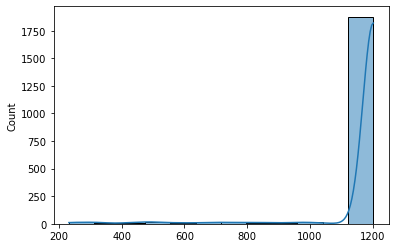

In [165]:
sns.histplot(datesperid.values,label={ratio},kde=True)

In [77]:
bydates=stock.groupby(['Date'])['SecuritiesCode'].count()

In [78]:
sumofdates=(bydates==bydates.max()).sum()

In [80]:
ratiodate=round(sumofdates/len(bydates)*100,2)

In [81]:
print(ratiodate)

19.3


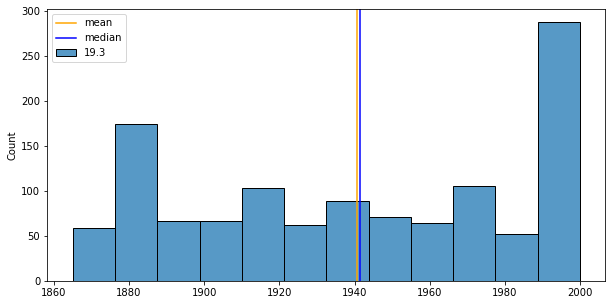

In [97]:
fig,ax=plt.subplots(figsize=(10,5))
ax.axvline(bydates.mean(),color='orange',label='mean')
ax.axvline(bydates.median(),color='blue',label='median')
sns.histplot(bydates.values,label=ratiodate)
plt.legend()

In [83]:
stock.groupby(['Date'])['SecuritiesCode'].count()

Date
2017-01-04    1865
2017-01-05    1865
2017-01-06    1865
2017-01-10    1865
2017-01-11    1865
              ... 
2021-11-29    2000
2021-11-30    2000
2021-12-01    2000
2021-12-02    2000
2021-12-03    2000
Name: SecuritiesCode, Length: 1202, dtype: int64

In [137]:
stock['Close'].isnull().sum()

7608

In [127]:
datesas=stock.loc[stock["Close"].isnull()]['Date'].value_counts()

<AxesSubplot:ylabel='Count'>

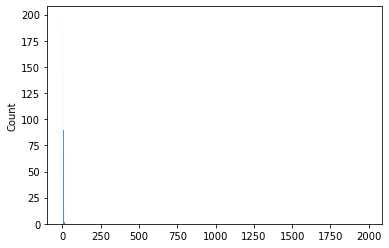

In [128]:
sns.histplot(datesas.values)

In [138]:
stock.loc[stock["Close"].isnull()]['Date'].value_counts()


2020-10-01    1988
2017-03-16      15
2019-04-04      14
2019-10-09      14
2021-10-29      13
              ... 
2017-11-15       1
2019-05-14       1
2018-01-17       1
2021-03-19       1
2018-09-25       1
Name: Date, Length: 1175, dtype: int64

In [140]:
stock.head()

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026


In [168]:
targetmean=stock.groupby(['SecuritiesCode'])['Target'].mean()

<AxesSubplot:ylabel='Count'>

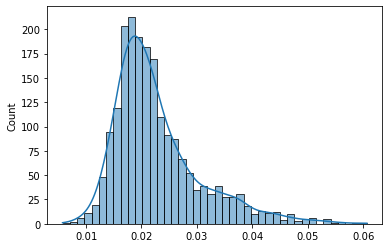

In [169]:
sns.histplot(target.values,kde=True)

In [152]:
stock['SecuritiesCode'].nunique()

2000

In [153]:
stock.groupby(['SecuritiesCode'])['Target'].mean()

SecuritiesCode
1301    0.000176
1332    0.000157
1333   -0.000114
1375   -0.001486
1376    0.000068
          ...   
9990   -0.000530
9991   -0.000132
9993   -0.000016
9994    0.000429
9997    0.000204
Name: Target, Length: 2000, dtype: float64

<AxesSubplot:ylabel='Count'>

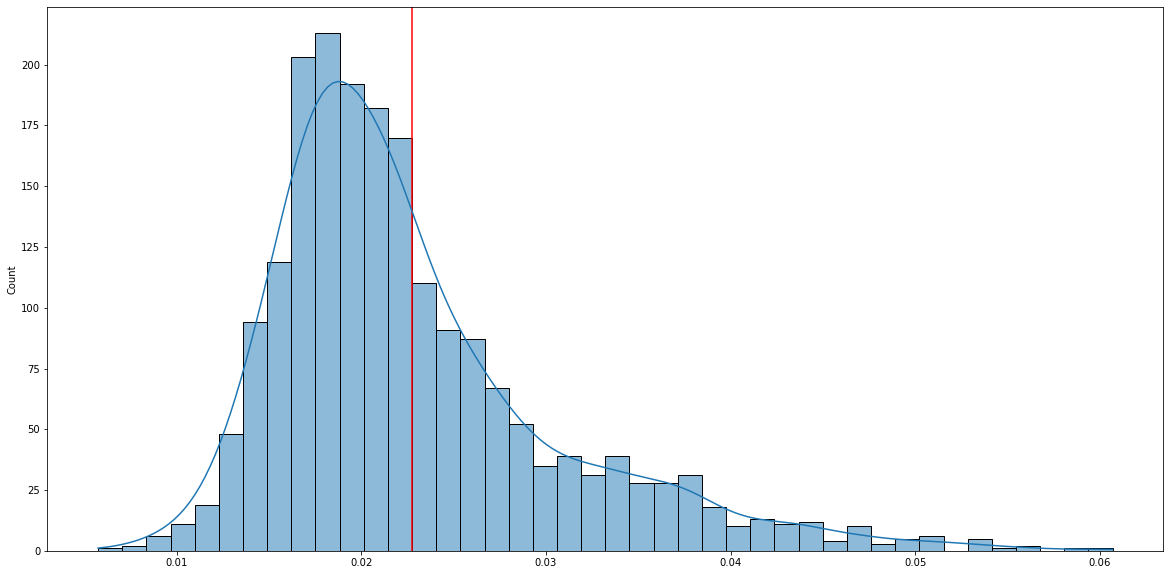

In [180]:
fig,ax=plt.subplots(figsize=(20,10))

targetstd=stock.groupby(['SecuritiesCode'])['Target'].std()
ax.axvline(targetstd.mean(),color='red')

sns.histplot(target.values,kde=True)

In [171]:
stock.groupby(['SecuritiesCode'])['Target'].std()

SecuritiesCode
1301    0.012862
1332    0.018726
1333    0.016438
1375    0.015739
1376    0.017435
          ...   
9990    0.019395
9991    0.017219
9993    0.011822
9994    0.018109
9997    0.024332
Name: Target, Length: 2000, dtype: float64

In [167]:
stock.groupby(['SecuritiesCode'])["Date"].count()

SecuritiesCode
1301    1202
1332    1202
1333    1202
1375     297
1376    1202
        ... 
9990    1202
9991    1202
9993    1202
9994    1202
9997    1202
Name: Date, Length: 2000, dtype: int64

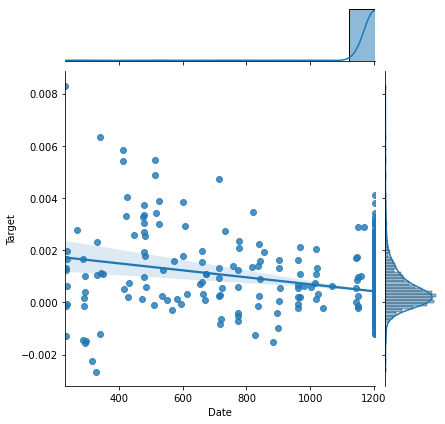

In [174]:
ax=sns.jointplot(x=datesperid,y=targetmean,kind="reg")
plt.show()

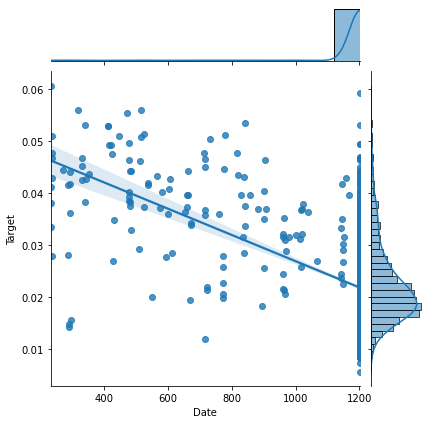

In [177]:
ax=sns.jointplot(x=datesperid,y=targetstd,kind='reg')
plt.show()

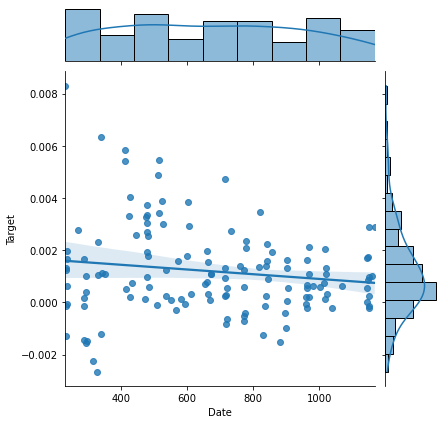

In [181]:
datesperid=datesperid[datesperid!=1202]
targetmean=targetmean[targetmean.index.isin(datesperid.index)]
ax=sns.jointplot(x=datesperid,y=targetmean,kind='reg')

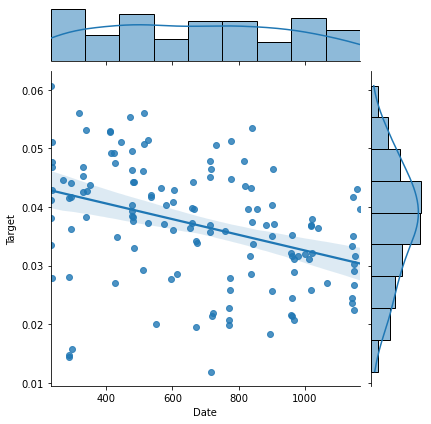

In [184]:
targetstd=targetstd[targetstd.index.isin(datesperid.index)]
ax=sns.jointplot(x=datesperid,y=targetstd,kind='reg')
plt.show()

In [201]:
tm=targetmean.max()

In [202]:
maxstock=targetmean[targetmean==tm].index.values[0]
print(maxstock)

4169


<AxesSubplot:ylabel='Count'>

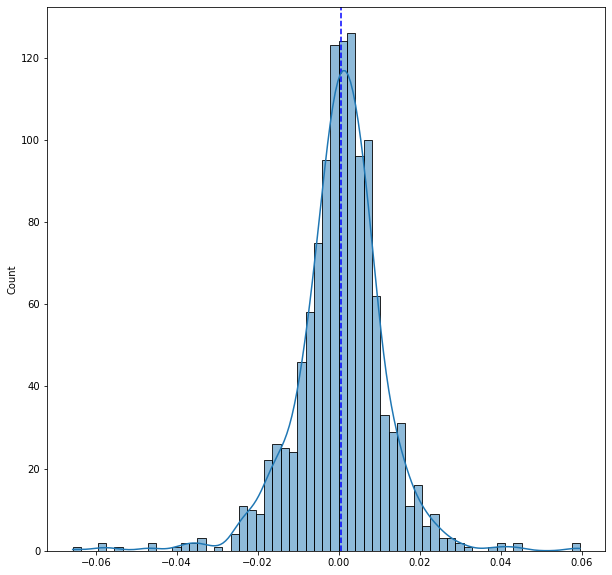

In [210]:
fig,ax=plt.subplots(figsize=(10,10))
datetarget=stock.groupby(['Date'])['Target'].mean()
datetargetmean=datetarget.mean()
ax.axvline(datetargetmean,linestyle='--', color='blue')
sns.histplot(datetarget.values,kde=True)

In [213]:
round(datetarget.skew(),2),round(datetarget.kurtosis(),2)

(-0.47, 5.13)

<AxesSubplot:ylabel='Count'>

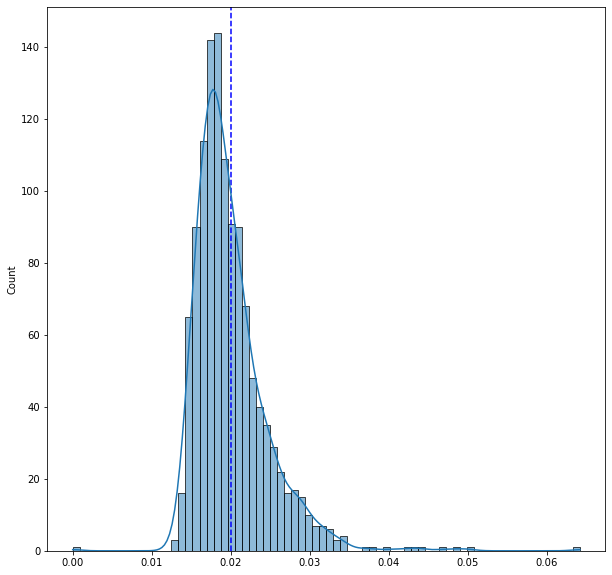

In [219]:
fig,ax=plt.subplots(figsize=(10,10))
datetargetstd=stock.groupby(['Date'])['Target'].std()
datetargetstdmean=datetargetstd.mean()
ax.axvline(datetargetstdmean,linestyle='--', color='blue')
sns.histplot(datetargetstd.values,kde=True)

In [215]:
round(datetarget.skew(),2),round(datetarget.kurtosis(),2)


(2.24, 11.53)

In [218]:
datetargetstd=datetargetstd[datetargetstd==0].index.values
print(datetargetstd)

['2020-09-29']


In [223]:
tm=datetarget.max()
datetargetmean=datetargetmean[datetargetmean==tm].index.values[0]

TypeError: 'float' object is not subscriptable

In [225]:
datetarget


Date
2017-01-04    0.016376
2017-01-05    0.018110
2017-01-06    0.017747
2017-01-10    0.016673
2017-01-11    0.014910
                ...   
2021-11-29    0.019466
2021-11-30    0.022477
2021-12-01    0.021727
2021-12-02    0.019898
2021-12-03    0.019700
Name: Target, Length: 1202, dtype: float64